<a href="https://colab.research.google.com/github/sandipbnkr/MachineLearning/blob/main/Medical_Expenses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Step 1 Findings:

Columns present 3 diffrent data types - int, object and float. Data type changes are necessary
We can see that the DataFrame has 7 columns and 1338 rows

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.isnull().shape

(1338, 7)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [ ]:
for i in df.columns:
  print("Unique values in column {0}: {1} : {2}".format(i,df[i].nunique(),df[i].unique()))

Unique values in column age: 47 : [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
Unique values in column sex: 2 : ['female' 'male']
Unique values in column bmi: 548 : [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28

In [ ]:
'''Note:

Possible changes:

"Sex" - should be used as a binary 1 - for male and 0 for female
"Smoker" - similar to the previous with 1 - for yes and 0- for no
"Region" used as dummy variable
'''

In [ ]:
df['age'].values

array([19, 18, 28, ..., 18, 21, 61])

In [ ]:
bins=list(range(1,100,5))
df['age_bins']=pd.cut(df['age'],bins)

In [ ]:
df['age_bins']

0       (16, 21]
1       (16, 21]
2       (26, 31]
3       (31, 36]
4       (31, 36]
          ...   
1333    (46, 51]
1334    (16, 21]
1335    (16, 21]
1336    (16, 21]
1337    (56, 61]
Name: age_bins, Length: 1338, dtype: category
Categories (19, interval[int64, right]): [(1, 6] < (6, 11] < (11, 16] < (16, 21] ... (76, 81] <
                                          (81, 86] < (86, 91] < (91, 96]]

In [ ]:
df['age_bin'] = pd.qcut(df['age'], q=4, labels=False)
df['age_bins']

0       (16, 21]
1       (16, 21]
2       (26, 31]
3       (31, 36]
4       (31, 36]
          ...   
1333    (46, 51]
1334    (16, 21]
1335    (16, 21]
1336    (16, 21]
1337    (56, 61]
Name: age_bins, Length: 1338, dtype: category
Categories (19, interval[int64, right]): [(1, 6] < (6, 11] < (11, 16] < (16, 21] ... (76, 81] <
                                          (81, 86] < (86, 91] < (91, 96]]

In [ ]:
df.drop(columns=['age_bins','age_bin'],inplace=True,axis=0)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#Checking for missing/null data

for col in df.columns:
    #to return missing values in a column we use.isnull.
    percentage_of_missing = np.mean(df[col].isnull())
    #this commands shows the mean of the null values in the columns
    print(col, '\t', percentage_of_missing * 100, '%')

age 	 0.0 %
sex 	 0.0 %
bmi 	 0.0 %
children 	 0.0 %
smoker 	 0.0 %
region 	 0.0 %
charges 	 0.0 %


In [ ]:
#checking duplicates
df.duplicated().sum()

1

In [ ]:
#there is one duplicate record
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

In [ ]:
#applying one hot encoder
df2 = pd.get_dummies(df, columns=['sex','region','smoker'])
df2.head(2)


,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.90,0,16884.9240,True,False,False,False,False,True,False,True
1,18,33.77,1,1725.5523,False,True,False,False,True,False,True,False


In [ ]:
#applying Lable Encoding (categorical_data)
#we need to seperate cat and numeric features
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['age', 'bmi', 'children', 'charges']

In [ ]:
cat_features=[col for col in df.columns if df[col].dtype=='O']
cat_features

['sex', 'smoker', 'region']

In [ ]:
#converting num data to specific range
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_array = scaler.fit_transform(df[num_features])

scaled_data = pd.DataFrame(scaled_array, columns = num_features)

scaled_data.head()

,age,bmi,children,charges
0,-1.440418,-0.453160,-0.909234,0.297857
1,-1.511647,0.509422,-0.079442,-0.954381
2,-0.799350,0.383155,1.580143,-0.729373
3,-0.443201,-1.305052,-0.909234,0.719104
4,-0.514431,-0.292456,-0.909234,-0.777499


In [ ]:
#converting cat data by binary encoding
# Convert 'region' column into dummy variables by using binary encoding, and changing dtype to int
dummy_region = pd.get_dummies(df['region'], dtype=int)
df3 = pd.concat([dummy_region,scaled_data], axis=1)
df3.head()

,northeast,northwest,southeast,southwest,age,bmi,children,charges
0,0.0,0.0,0.0,1.0,-1.440418,-0.453160,-0.909234,0.297857
1,0.0,0.0,1.0,0.0,-1.511647,0.509422,-0.079442,-0.954381
2,0.0,0.0,1.0,0.0,-0.799350,0.383155,1.580143,-0.729373
3,0.0,1.0,0.0,0.0,-0.443201,-1.305052,-0.909234,0.719104
4,0.0,1.0,0.0,0.0,-0.514431,-0.292456,-0.909234,-0.777499


In [ ]:
df3['child']=df2['children']
df3.drop(['children'],axis=1,inplace=True)
df3.head(2)

,northeast,northwest,southeast,southwest,age,bmi,charges,child
0,0.0,0.0,0.0,1.0,-1.440418,-0.453160,0.297857,0.0
1,0.0,0.0,1.0,0.0,-1.511647,0.509422,-0.954381,1.0


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Define a dictionary to map categories into binary values
sex_mapping = {'female': 0, 'male': 1}

# Apply the mapping to the 'sex' column
df3['sex'] = df['sex'].map(sex_mapping)

In [ ]:
smoker_mapping = {'no': 0, 'yes': 1}

# Apply the mapping to the 'sex' column
df3['smoker'] = df['smoker'].map(smoker_mapping)

In [ ]:
df3.head(2)

,northeast,northwest,southeast,southwest,age,bmi,charges,child,sex,smoker
0,0.0,0.0,0.0,1.0,-1.440418,-0.453160,0.297857,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,-1.511647,0.509422,-0.954381,1.0,1.0,0.0


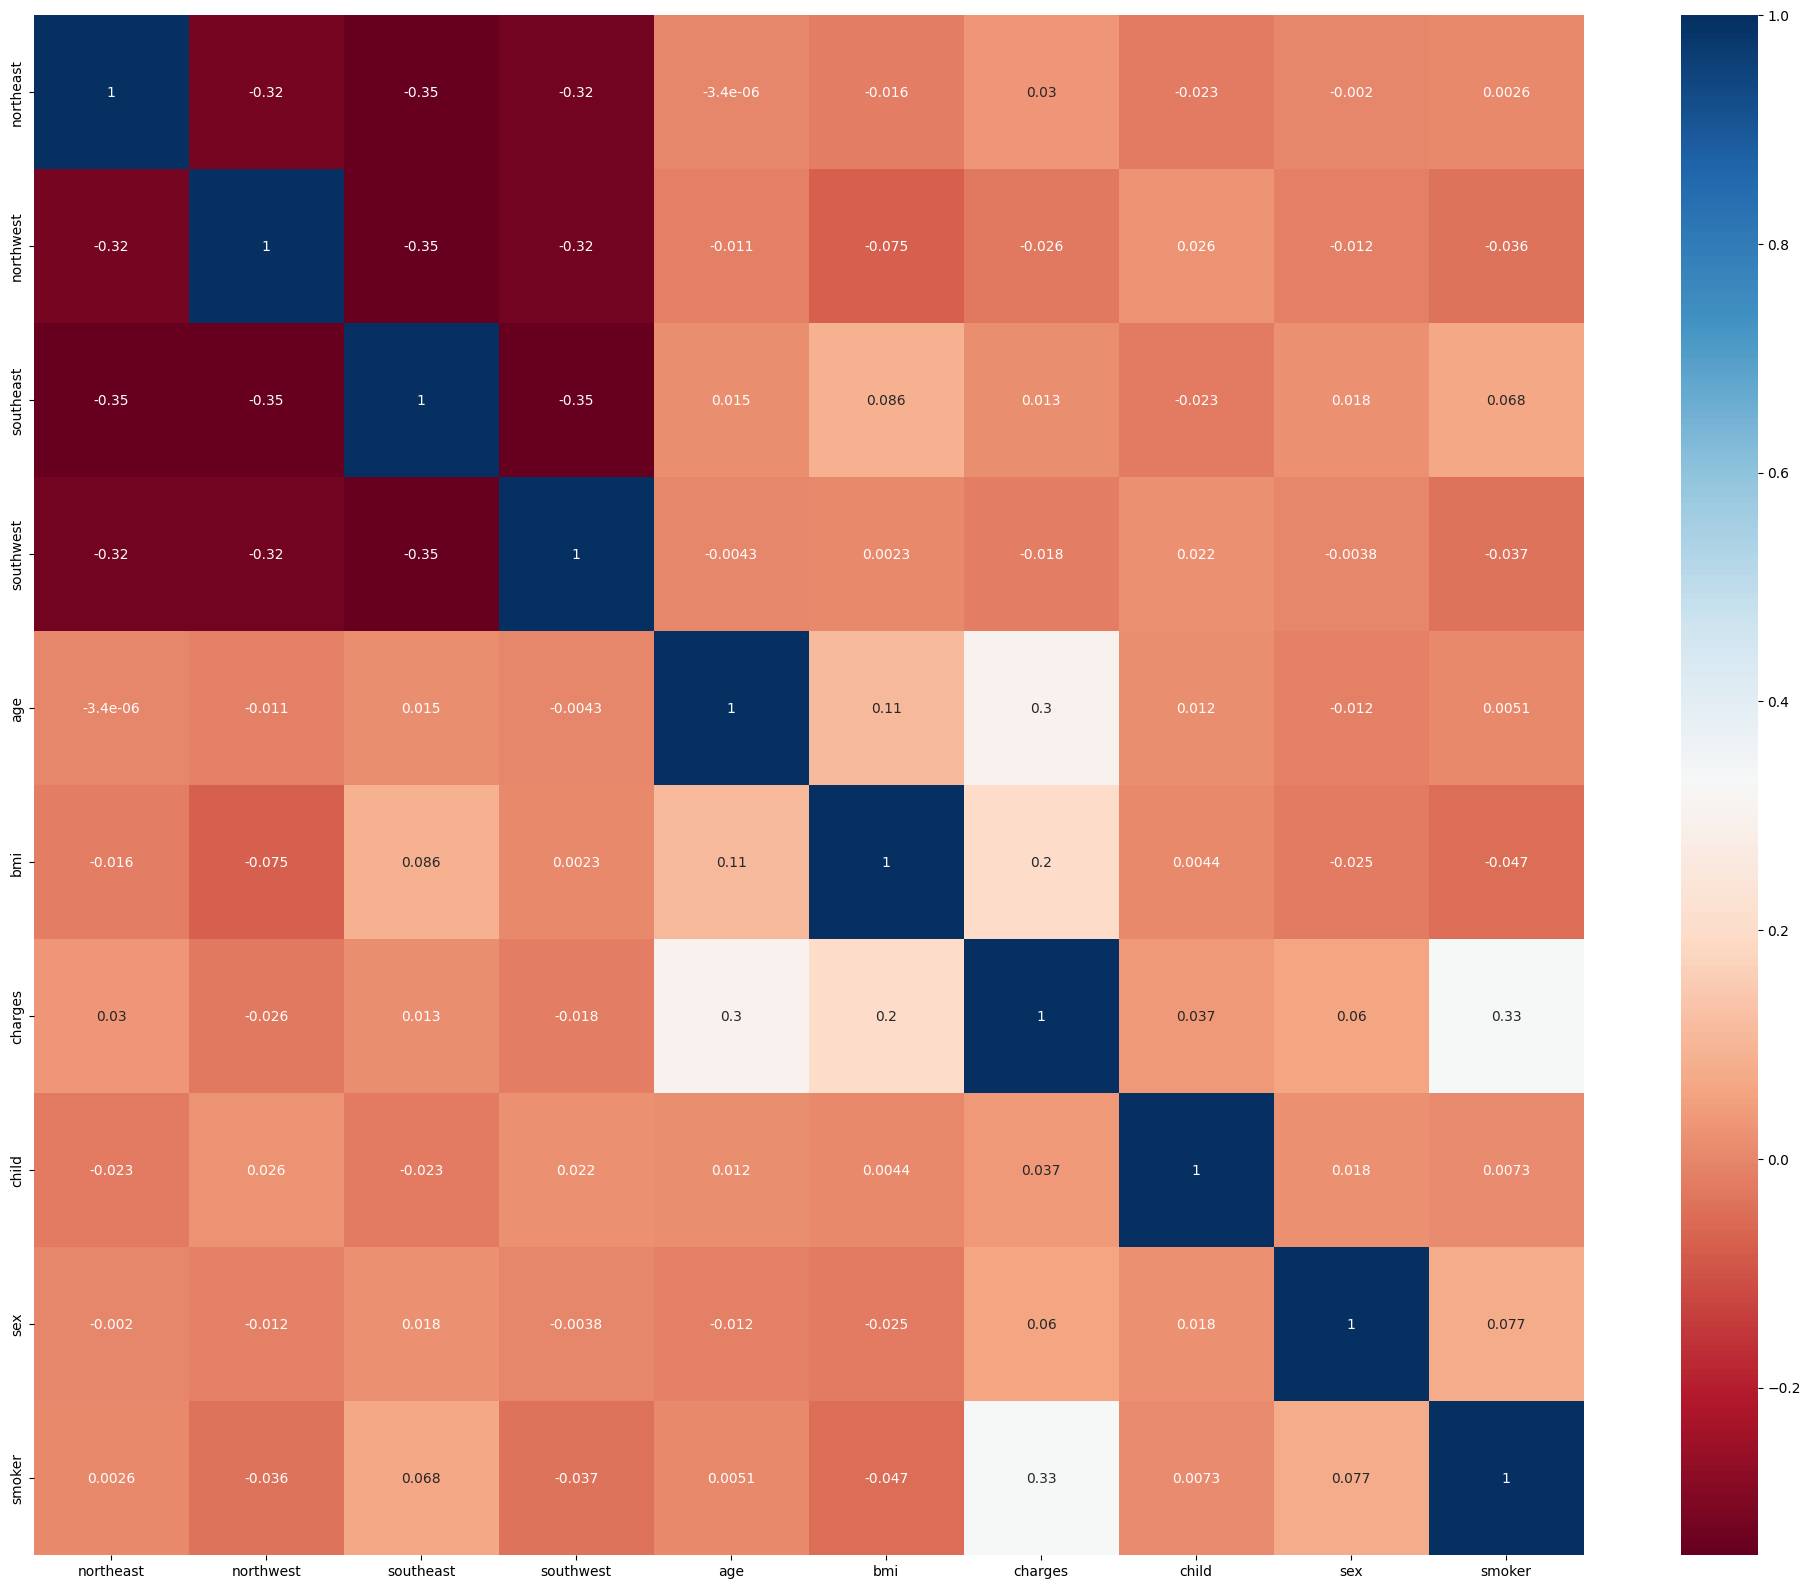

In [ ]:
# Vizualing Correlation Matrix

plt.figure(figsize = (25,20))
sns.heatmap(df3.corr(), annot = True, cmap="RdBu")
plt.show()

Insights from Correlation Matrix:

Different Regions seem to be highly correlated
Smoking highly influences the target variable charges (postive correlation, meaning that if the client smokes the higher the charges (-0.79))
Age (0.3) and bmi (0.2) also seem to be impactful on charges, although on a lower level than smoking

**Data Visualization**

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
aged_ppl=df[df['age']>=60]
normal_age=df[df['age']<60]

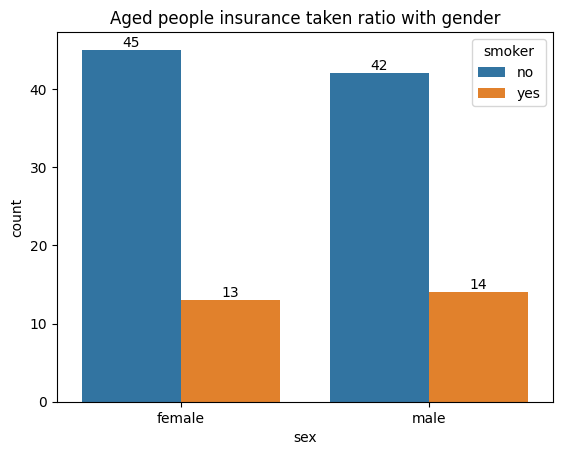

In [ ]:
ax=sns.countplot(data=aged_ppl,x='sex',hue='smoker')
plt.title('Aged people insurance taken ratio with gender')
for bar in ax.containers:
    ax.bar_label(bar)



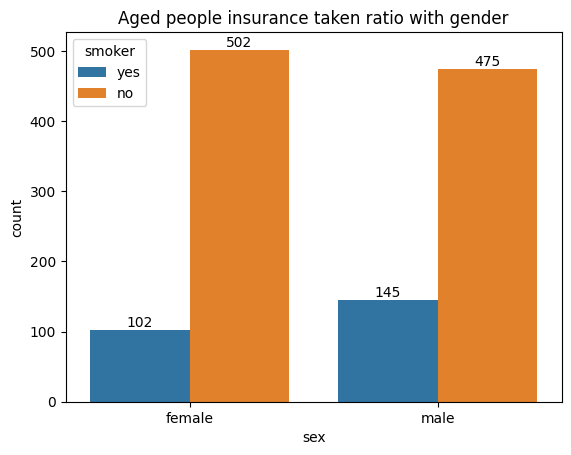

In [ ]:
ax=sns.countplot(data=normal_age,x='sex',hue='smoker')
plt.title('Aged people insurance taken ratio with gender')
for bar in ax.containers:
    ax.bar_label(bar)


In [ ]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


<Axes: >

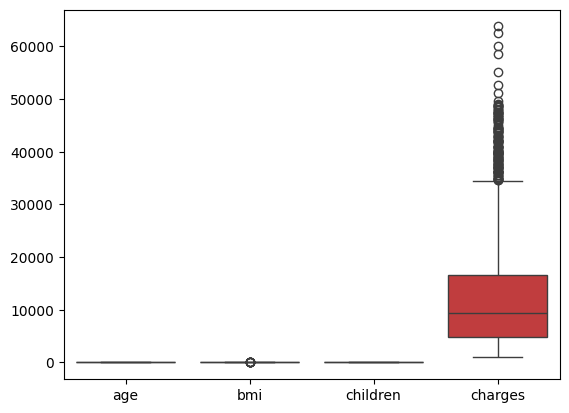

In [ ]:
sns.boxplot(data=df)

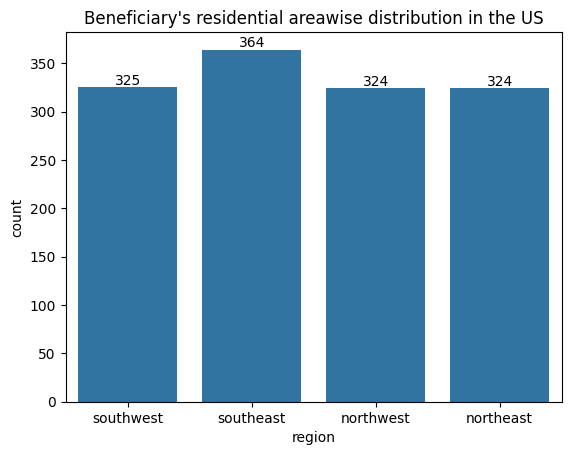

In [ ]:
#charges contains outliers
ax=sns.countplot(data=df,x='region')
plt.title("Beneficiary's residential areawise distribution in the US")
for bar in ax.containers:
    ax.bar_label(bar)

In [ ]:
df3.head(2)

,northeast,northwest,southeast,southwest,age,bmi,charges,child,sex,smoker
0,0.0,0.0,0.0,1.0,-1.440418,-0.453160,0.297857,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,-1.511647,0.509422,-0.954381,1.0,1.0,0.0


Text(0.5, 1.0, 'analysis based on age')

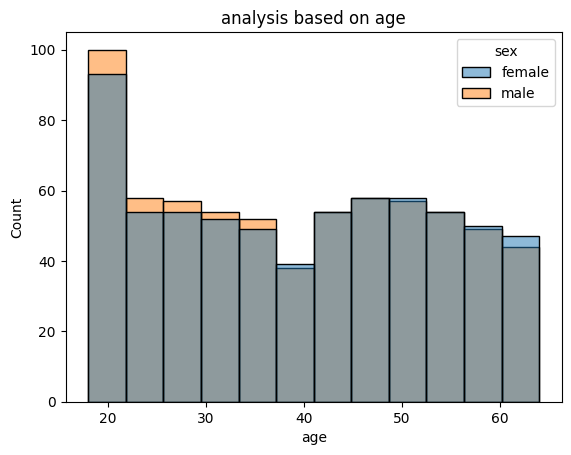

In [ ]:
sns.histplot(data=df,x='age',hue='sex')
plt.title('analysis based on age')

Text(0.5, 1.0, 'Number of children covered ')

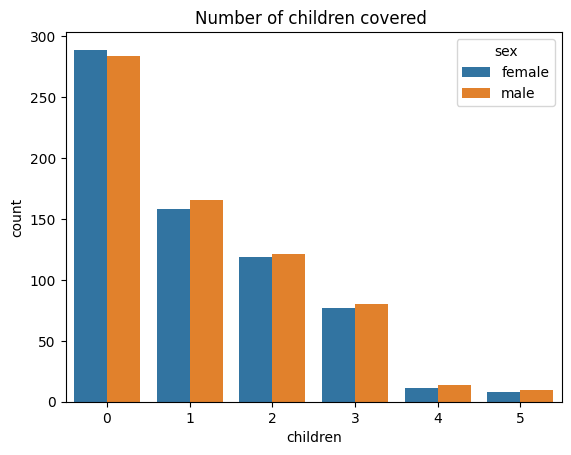

In [ ]:
sns.countplot(data=df,x='children',hue='sex')
plt.title('Number of children covered ')

Text(0.5, 1.0, 'Analysis based on BMI')

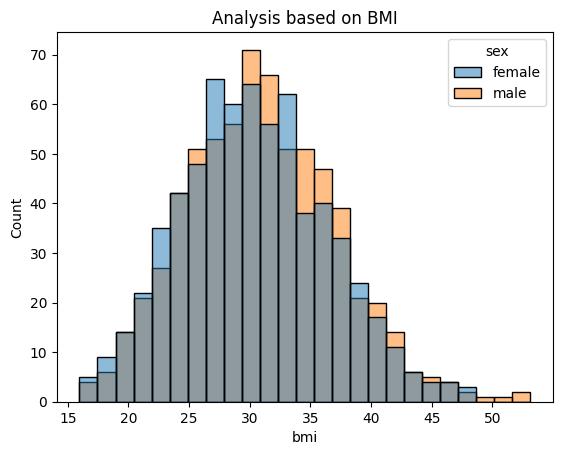

In [ ]:
sns.histplot(data=df,x='bmi',hue='sex')
plt.title('Analysis based on BMI')

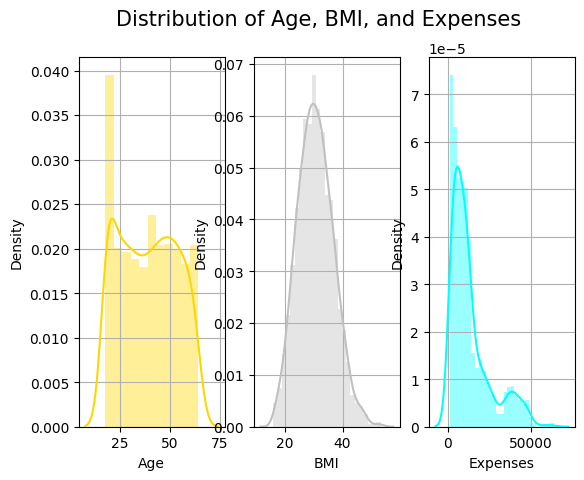

In [ ]:
#distribution
plt.subplot(1, 3, 1)
sns.distplot(df['age'], color = 'gold')
plt.xlabel('Age')
plt.grid()

plt.subplot(1, 3, 2)
sns.distplot(df['bmi'], color = 'silver')
plt.xlabel('BMI')
plt.grid()

plt.subplot(1, 3, 3)
sns.distplot(df['charges'], color = 'aqua')
plt.xlabel('Expenses')
plt.grid()

plt.suptitle('Distribution of Age, BMI, and Expenses', fontsize = 15)
plt.show()

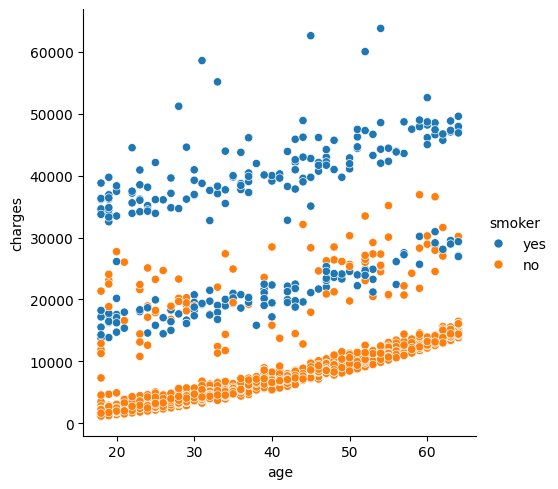

In [ ]:
sns.relplot(data=df, y = 'charges',x = 'age',hue="smoker")
#effect of age on charges with age

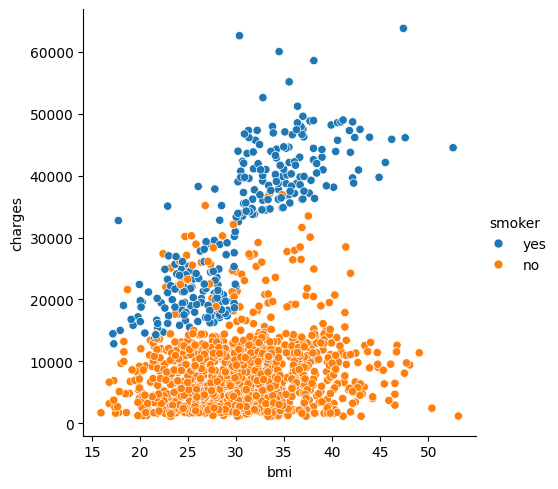

In [ ]:
sns.relplot(data=df, y = 'charges',x = 'bmi',hue="smoker")
#effect of age on charges with age

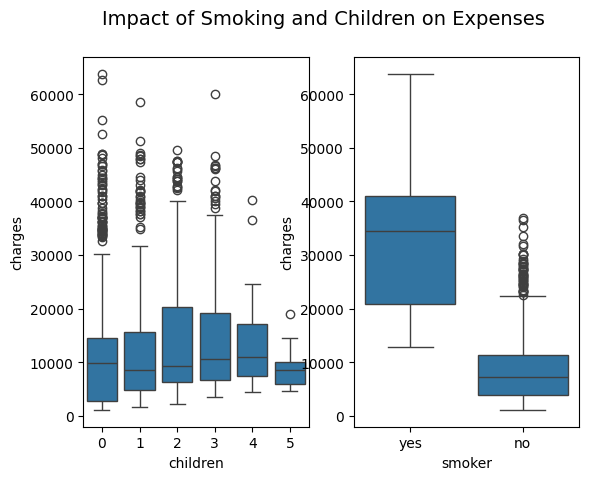

In [ ]:
plt.subplot(1, 2, 1)
sns.boxplot(x=df['children'], y=df['charges'],data=df)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['smoker'], y=df['charges'],data=df)

plt.suptitle('Impact of Smoking and Children on Expenses', fontsize = 14)
plt.show()

Text(0.5, 1.0, 'Smoking Yes/No')

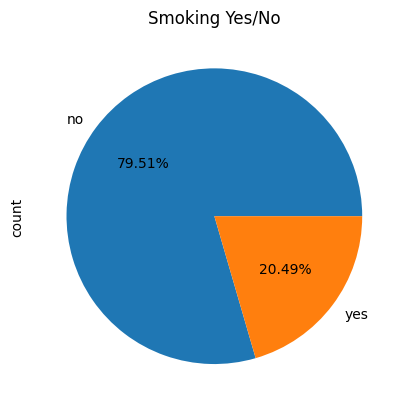

In [ ]:
df['smoker'].value_counts().plot(kind='pie',autopct = "%0.2f%%")
plt.title("Smoking Yes/No")

Text(0.5, 1.0, "Beneficiary's residential areawise distribution ")

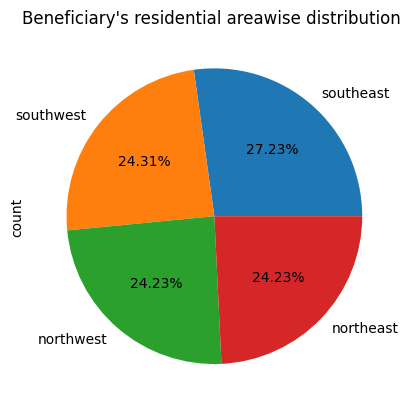

In [ ]:
df['region'].value_counts().plot(kind='pie',autopct = "%0.2f%%")
plt.title("Beneficiary's residential areawise distribution ")

In [ ]:
df3.dropna(inplace=True)

In [ ]:
# Separate dependent & independent features
df3.head(2)


,northeast,northwest,southeast,southwest,age,bmi,charges,child,sex,smoker
0,0.0,0.0,0.0,1.0,-1.440418,-0.453160,0.297857,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,-1.511647,0.509422,-0.954381,1.0,1.0,0.0


In [ ]:
y=df3['charges']
X=df3.drop(['charges'],axis=1)


In [ ]:
#Splitting Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=0)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn import metrics

Checking for overfitting:

In order to check for overfitting a Ridge regression is used. This technique allows a regularization to prevent overfitting in linear regression models, including polynomial regression.

It does so by adding a penalty term to the least squares loss function, which forces the coefficients to be smaller. This can help reduce the model's sensitivity to the input data and improve its generalization performance.

In some cases, using ridge regression with polynomial features can improve the performance of the model, especially when the polynomial features lead to high variance (overfitting). Ridge regression can help reduce this overfitting by penalizing large coefficients.

In [ ]:
models = []
#model 1: Ridge
models.append(('Ridge', Ridge(solver='auto',alpha=0.5,  max_iter=12)))

In [ ]:
# Model 2 Multiple Linear Regression
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
models.append(('LR', model1))


In [ ]:
#model 3
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
polyreg = make_pipeline(PolynomialFeatures(degree = 2, include_bias=False), LinearRegression())
models.append(('Polynomial', polyreg))


In [ ]:
for name, model in models:
  print("Model:",name)
  model.fit(x_train,y_train)
  print('Training score : {}'.format(model.score(x_train,y_train)))
  y_prediction=model.predict(x_test)
  print('predictions are: \n {}'.format(y_prediction[:10]))
  print('\n')
  r2_score=metrics.r2_score(y_test,y_prediction)
  print('r2 score: {}'.format(r2_score))
  print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
  print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
  print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
  #sns.distplot(y_test-y_prediction)
  print('\n \n')

Model: Ridge
Training score : 0.2225517643255469
predictions are: 
 [-0.39052567 -0.20775686 -0.62104796 -0.6674692   0.41107417  0.36193813
 -0.37821663 -0.63109074 -0.09362132  0.3302295 ]


r2 score: 0.25403123402623906
MAE: 0.6739711281738745
MSE: 0.8202939954656019
RMSE: 0.9057008311057255

 

Model: LR
Training score : 0.2225544249015322
predictions are: 
 [-0.38867188 -0.20703125 -0.61962891 -0.66699219  0.41308594  0.36376953
 -0.37695312 -0.62939453 -0.09179688  0.33105469]


r2 score: 0.2541543059423803
MAE: 0.6740996695915789
MSE: 0.8201586611749103
RMSE: 0.905626115554819

 

Model: Polynomial
Training score : 0.26689848985323505
predictions are: 
 [-0.49808109 -0.1353873  -0.73596346 -0.66208255  0.40594244  0.38466024
 -0.22794199 -0.56941593 -0.01979816  0.32263577]


r2 score: 0.2795869352340815
MAE: 0.6577089722778917
MSE: 0.7921920303339364
RMSE: 0.8900517009331179

 



Ridge Regression seems to be the best option

Hypothesis testing:

H0: The sum of the model of coefficents = 0 (meaning model does not predict charges by using features available)

H1: The sum of the model of coefficents ≠ 0 (meaning model does predict charges by using features available)

In this case we can clearly reject the Null Hypothesis, since not only coefficents ≠ 0, but also, we do have a model that performs well in predicting the target variable (insurance) by using the features provided in the dataset.

Summary:

After looking at all the analysis done and models performed the following conclusion about this dataset can be taken.

Model 4 where a ridge regression was performed on the polynomial regression is able to account for 89% of the variables impact on the target variable 'charges'. Meaning that is has a high capability to predict charges of a certain client considering the feature provided to us and used in our model. The model also presented a low RMSE (21127497.39) which adds to the fact that the model fits the data well and produces precise predictions.
From looking at out models, as well as our vizualizations, we can see that the variable 'smoker' has the highest influence (with smoking = yes having significantly higher charges than smoking = 0 for comparable individuals).
Features 'age' and 'bmi' seem to have the second highest impact (something that is somehwat expected, since the older you get the more overall healthy issue you will have. The same is true for body mass index, the higher an individual's BMI the less healthy he will be.
Overall, the work done produced a model worth using, and that will be helpful in predicting insurance charges for an individual.